In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random


In [5]:
DATA_DIR = Path("data/part_A_final/train_data/images")
print("Total images:", len(list(DATA_DIR.glob("*.jpg"))))


Total images: 300


In [1]:
from pathlib import Path

folders = [
    "data/part_A_final/train_data/images",
    "data/part_A_final/test_data/images",
    "data/part_B_final/train_data/images",
    "data/part_B_final/test_data/images"
]

for f in folders:
    count = len(list(Path(f).glob("*.jpg")))
    print(f"{f}: {count} images")


data/part_A_final/train_data/images: 300 images
data/part_A_final/test_data/images: 182 images
data/part_B_final/train_data/images: 400 images
data/part_B_final/test_data/images: 316 images


In [2]:
import os

folder = "data/part_A_final/train_data/ground_truth"
print(os.listdir(folder))


['GT_IMG_1.mat', 'GT_IMG_10.mat', 'GT_IMG_100.mat', 'GT_IMG_101.mat', 'GT_IMG_102.mat', 'GT_IMG_103.mat', 'GT_IMG_104.mat', 'GT_IMG_105.mat', 'GT_IMG_106.mat', 'GT_IMG_107.mat', 'GT_IMG_108.mat', 'GT_IMG_109.mat', 'GT_IMG_11.mat', 'GT_IMG_110.mat', 'GT_IMG_111.mat', 'GT_IMG_112.mat', 'GT_IMG_113.mat', 'GT_IMG_114.mat', 'GT_IMG_115.mat', 'GT_IMG_116.mat', 'GT_IMG_117.mat', 'GT_IMG_118.mat', 'GT_IMG_119.mat', 'GT_IMG_12.mat', 'GT_IMG_120.mat', 'GT_IMG_121.mat', 'GT_IMG_122.mat', 'GT_IMG_123.mat', 'GT_IMG_124.mat', 'GT_IMG_125.mat', 'GT_IMG_126.mat', 'GT_IMG_127.mat', 'GT_IMG_128.mat', 'GT_IMG_129.mat', 'GT_IMG_13.mat', 'GT_IMG_130.mat', 'GT_IMG_131.mat', 'GT_IMG_132.mat', 'GT_IMG_133.mat', 'GT_IMG_134.mat', 'GT_IMG_135.mat', 'GT_IMG_136.mat', 'GT_IMG_137.mat', 'GT_IMG_138.mat', 'GT_IMG_139.mat', 'GT_IMG_14.mat', 'GT_IMG_140.mat', 'GT_IMG_141.mat', 'GT_IMG_142.mat', 'GT_IMG_143.mat', 'GT_IMG_144.mat', 'GT_IMG_145.mat', 'GT_IMG_146.mat', 'GT_IMG_147.mat', 'GT_IMG_148.mat', 'GT_IMG_149.mat'

In [6]:
files = list(DATA_DIR.glob("*.jpg"))
df = pd.DataFrame({
    "filename": [f.name for f in files],
    "path": [str(f) for f in files],
    "size_kb": [f.stat().st_size/1024 for f in files]
})
df.head()


filename                                             path     size_kb
0    IMG_1.jpg    data\part_A_final\train_data\images\IMG_1.jpg  163.782227
1   IMG_10.jpg   data\part_A_final\train_data\images\IMG_10.jpg  157.228516
2  IMG_100.jpg  data\part_A_final\train_data\images\IMG_100.jpg  167.000977
3  IMG_101.jpg  data\part_A_final\train_data\images\IMG_101.jpg  197.714844
4  IMG_102.jpg  data\part_A_final\train_data\images\IMG_102.jpg  111.965820

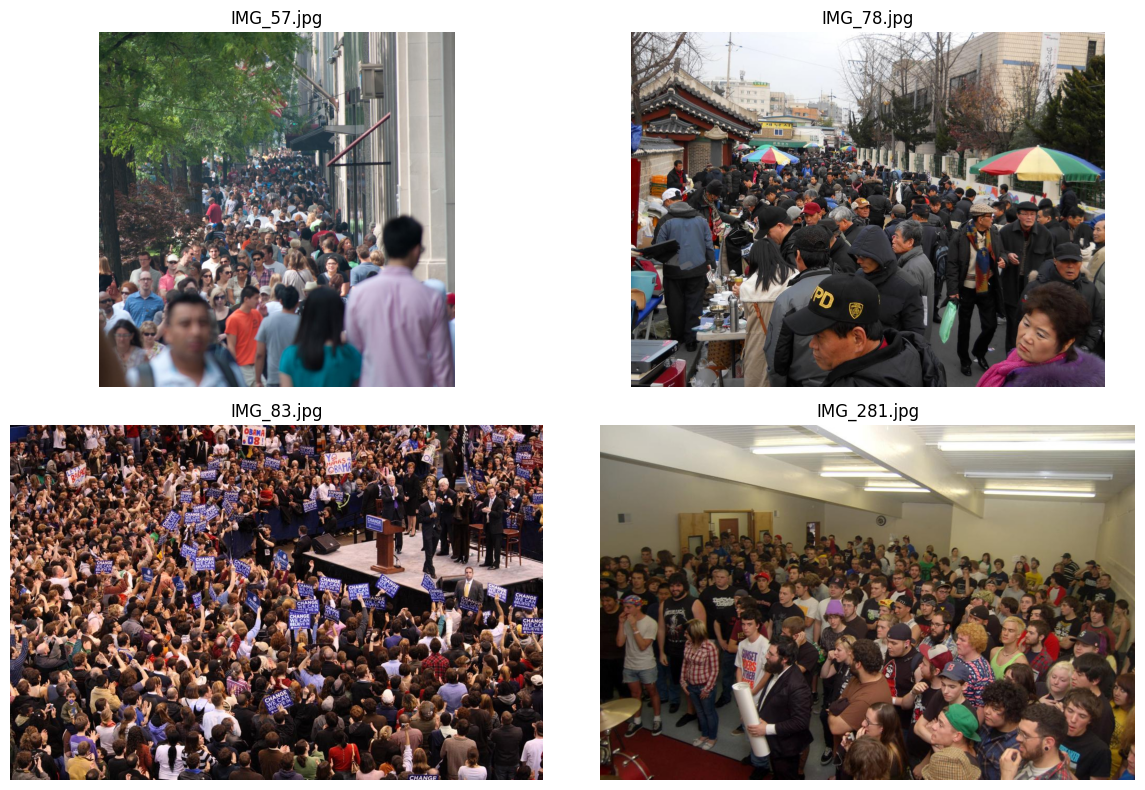

In [ ]:
sample_files = random.sample(files, 4)
plt.figure(figsize=(12,8))
for i, f in enumerate(sample_files):
    img = Image.open(f)
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(f.name)
    plt.axis("off")
plt.tight_layout()
plt.show()


Total Images: 300
Average Size (KB): 130.63
Min/Max Size (KB): 25.462890625 / 351.1015625


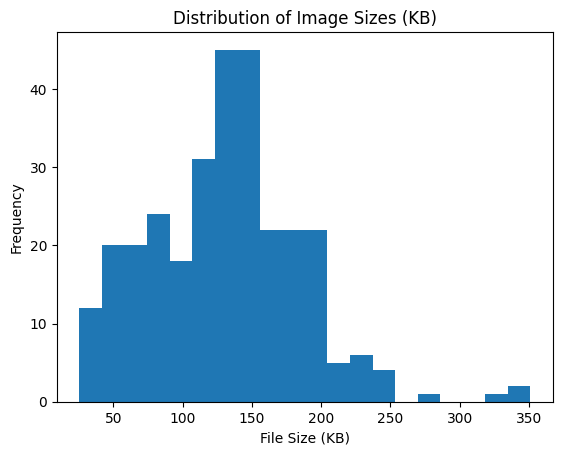

In [8]:
print("Total Images:", len(df))
print("Average Size (KB):", round(df["size_kb"].mean(),2))
print("Min/Max Size (KB):", df["size_kb"].min(), "/", df["size_kb"].max())

plt.hist(df["size_kb"], bins=20)
plt.title("Distribution of Image Sizes (KB)")
plt.xlabel("File Size (KB)")
plt.ylabel("Frequency")
plt.show()


In [3]:
import numpy as np

density = np.load("data/part_A_final/train_data/density_maps/IMG_1.npy")
print(density)
print("Shape:", density.shape)
print("Sum (count):", density.sum())


[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.5468667e-05 5.6929013e-05 5.9859929e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.5503697e-05 5.6964964e-05 5.9897728e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.5520268e-05 5.6981971e-05 5.9915612e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Shape: (768, 1024)
Sum (count): 1545.0


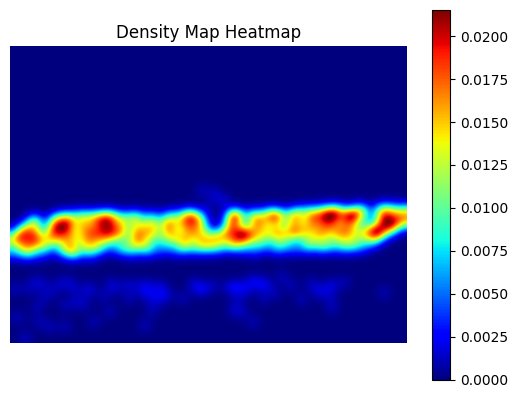

In [4]:
import numpy as np
import matplotlib.pyplot as plt

density = np.load("data/part_A_final/train_data/density_maps/IMG_1.npy")

plt.imshow(density, cmap='jet')
plt.colorbar()
plt.title("Density Map Heatmap")
plt.axis("off")
plt.show()


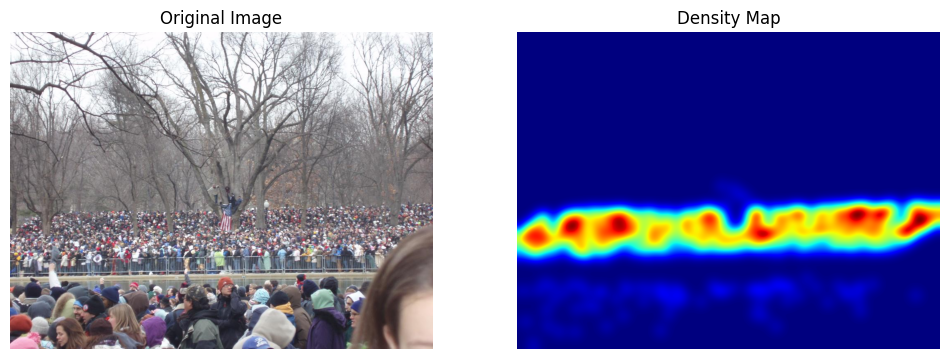

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("data/part_A_final/train_data/images/IMG_1.jpg")
density = np.load("data/part_A_final/train_data/density_maps/IMG_1.npy")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(density, cmap='jet')
plt.title("Density Map")
plt.axis("off")

plt.show()


DENSITY MAP INCLUDING GT POINTS

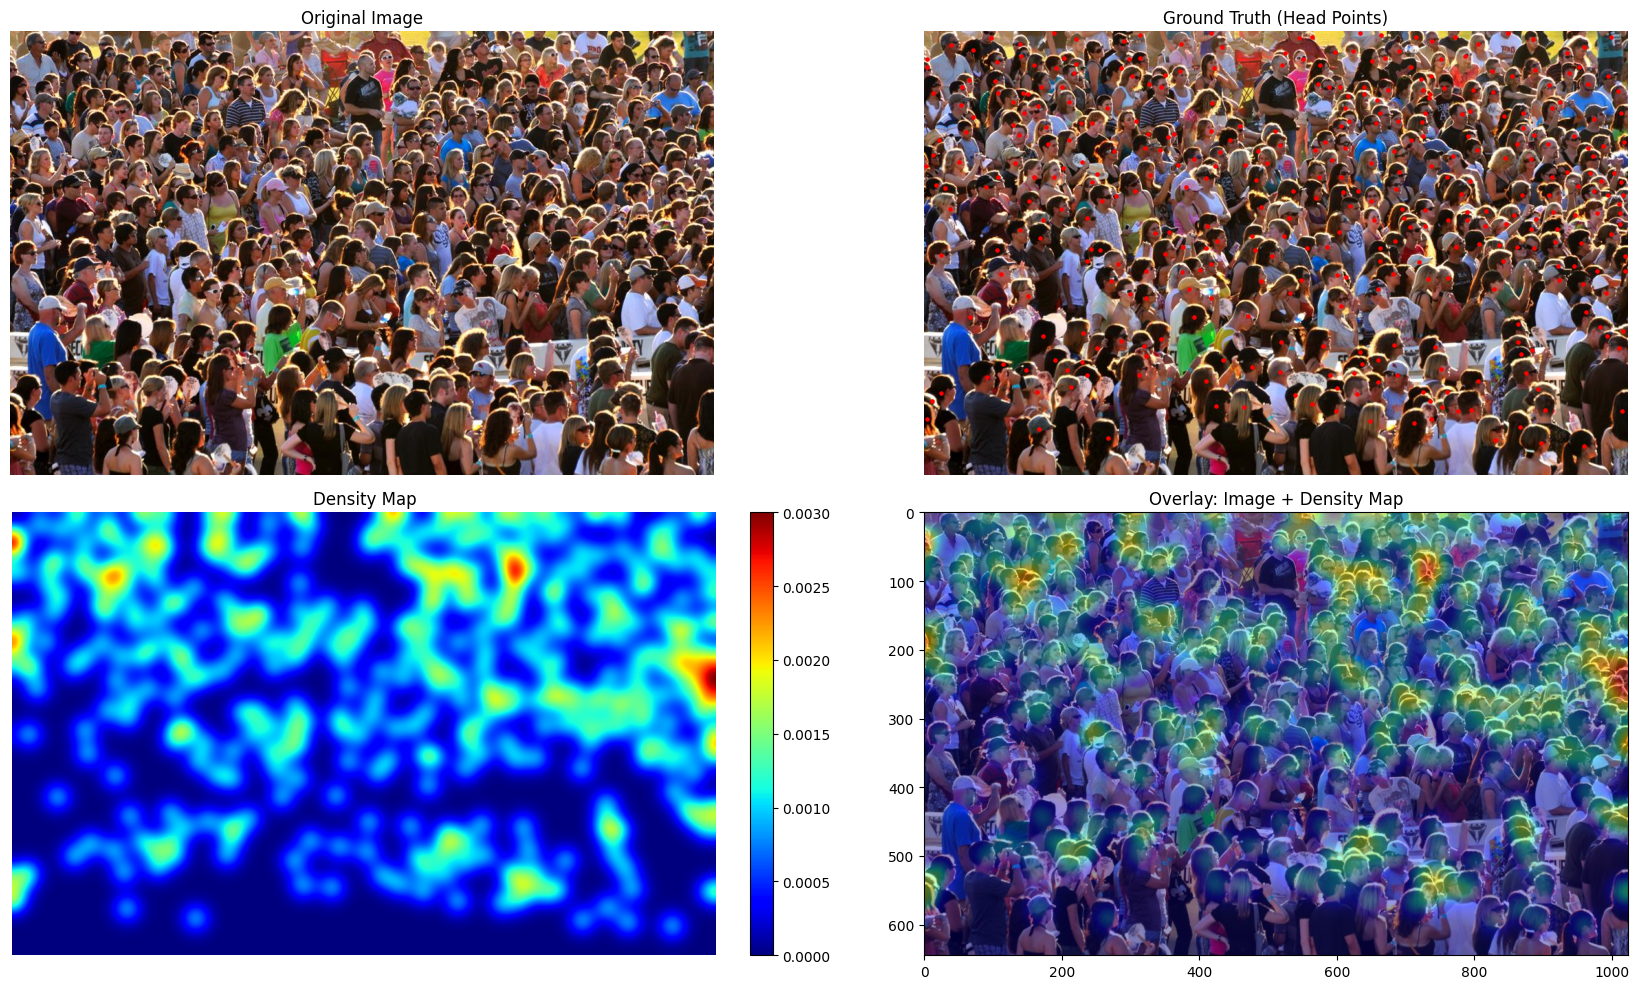

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ----------- CHANGE IMAGE NAME HERE -----------
img_path = "data/part_A_final/train_data/images/IMG_14.jpg"
gt_path = "data/part_A_final/train_data/ground_truth/GT_IMG_14.mat"
density_path = "data/part_A_final/train_data/density_maps/IMG_14.npy"
# ----------------------------------------------

import scipy.io as sio

# Load all data
img = np.array(Image.open(img_path))
density = np.load(density_path)
mat = sio.loadmat(gt_path)
points = mat["image_info"][0][0][0][0][0]

# Create overlay (normalize density map first)
density_norm = density / density.max()
density_color = plt.cm.jet(density_norm)[..., :3]   # only RGB, remove alpha

overlay = (0.6 * img/255.0) + (0.4 * density_color)  # 60% image + 40% density

plt.figure(figsize=(18, 10))

# ---- 1. Original Image ----
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# ---- 2. Ground Truth Points ----
plt.subplot(2, 2, 2)
plt.imshow(img)
plt.scatter(points[:, 0], points[:, 1], c='red', s=5)
plt.title("Ground Truth (Head Points)")
plt.axis("off")

# ---- 3. Density Map ----
plt.subplot(2, 2, 3)
heatmap = plt.imshow(density, cmap='jet')
plt.title("Density Map")
plt.axis("off")
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

# ---- 4. Overlay (Image + Density Map) ----
plt.subplot(2, 2, 4)
plt.imshow(overlay)
plt.title("Overlay: Image + Density Map")


plt.tight_layout()
plt.show()




In [15]:
import scipy.io as sio

gt_path = "data/part_A_final/train_data/ground_truth/GT_IMG_14.mat"

mat = sio.loadmat(gt_path)
points = mat["image_info"][0][0][0][0][0]

print("Ground Truth People Count:", len(points))


Ground Truth People Count: 378


In [17]:
import numpy as np
import scipy.io as sio

# Change file number here
img_id = "IMG_14"

# Paths
gt_path = f"data/part_A_final/train_data/ground_truth/GT_{img_id}.mat"
density_path = f"data/part_A_final/train_data/density_maps/{img_id}.npy"

# Load ground truth
mat = sio.loadmat(gt_path)
points = mat["image_info"][0][0][0][0][0]
gt_count = len(points)

# Load density map
density = np.load(density_path)
dm_count = density.sum()

print("====================================")
print(f"Image: {img_id}")
print("Ground Truth Count       :", gt_count)
print("Density Map Count (sum)  :", dm_count)
print("Difference               :", abs(gt_count - dm_count))
print("====================================")


Image: IMG_14
Ground Truth Count       : 378
Density Map Count (sum)  : 377.99997
Difference               : 3.0517578e-05
